# Feature Selection

In [30]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [31]:
# Import Cleaned Dataset
df = pd.read_csv('../Datasets/career_avgs.csv')
df.head()

,PLAYER_ID,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME
0,1630173,394,5.8,1.0,0.6,0.7,1.0,7.6,0.488,0.297,0.608,Precious Achiuwa
1,203500,769,8.0,1.5,0.8,0.9,1.4,8.8,0.586,0.059,0.535,Steven Adams
2,1628389,573,8.9,3.6,1.1,0.9,2.2,15.8,0.535,0.317,0.758,Bam Adebayo
3,1630534,286,2.8,1.2,0.6,0.5,0.8,7.2,0.440,0.336,0.713,Ochai Agbaji
4,1630583,242,5.3,1.9,0.6,0.6,0.9,9.8,0.458,0.344,0.684,Santi Aldama


5.014745321394485
2.6926246830223532
0.12755977403084376
0.17184101852910014
0.5554011755585139
32.59644688520236
0.007489180222178139
0.008648295183996688
0.011713417063137754


<Axes: xlabel='None'>

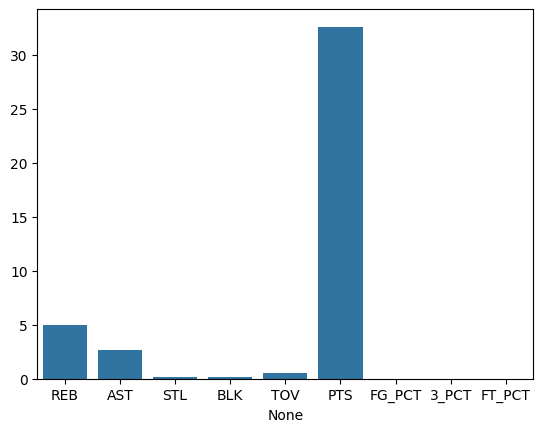

In [32]:
# Feature Selection using Variance Threshold
numeric_data = df.loc[:, "REB": "FT_PCT"]
variance_array = np.empty(numeric_data.shape[1])

for i in range(numeric_data.shape[1]):
    variance_array[i] = np.var(numeric_data.iloc[:, i])
    print(variance_array[i])

sns.barplot(x= numeric_data.columns, y= variance_array)

In [33]:
# Scaling the Features using standardization

scaler = StandardScaler().fit(df.loc[:, "REB": "FT_PCT"])
np_standardized = scaler.fit_transform(df.loc[:, "REB": "FT_PCT"])
np_standardized_df = pd.DataFrame(data= np_standardized, columns= df.loc[:, "REB": "FT_PCT"].columns).fillna(0)
np_standardized_df


,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT
0,0.950324,-0.602345,-0.143686,0.669008,-0.143380,-0.236932,0.365784,-0.198159,-1.327828
1,1.932746,-0.297638,0.416295,1.151474,0.393351,-0.026750,1.498207,-2.757403,-2.002327
2,2.334646,0.982130,1.256266,1.151474,1.466813,1.199313,0.908885,0.016903,0.058128
3,-0.389343,-0.480462,-0.143686,0.186542,-0.411745,-0.306993,-0.188873,0.221213,-0.357659
4,0.727046,-0.053873,-0.143686,0.427775,-0.277563,0.148402,0.019123,0.307238,-0.625611
...,...,...,...,...,...,...,...,...,...
564,-0.076754,4.760494,0.976276,-0.537157,4.150467,2.845741,-0.281316,0.382510,1.120694
565,1.888091,-0.419521,-0.703667,1.392707,0.124986,0.200948,1.798646,-2.499328,-0.172865
566,-0.166065,-0.297638,-0.423676,-0.537157,-0.411745,-0.254447,-0.466201,0.231966,1.120694
567,-0.835899,-0.663286,-0.983657,-0.537157,-0.814293,-0.972570,0.180898,0.414769,0.880462


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

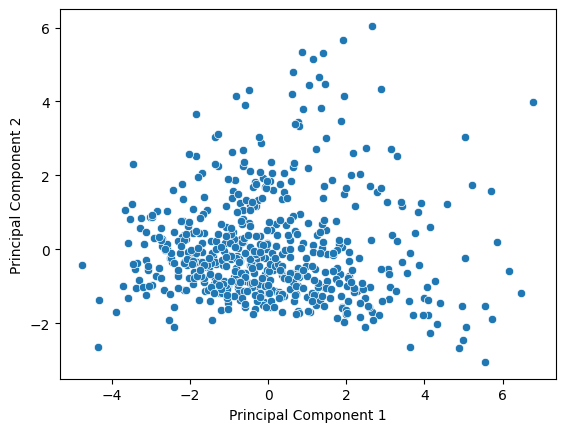

In [34]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(np_standardized_df)

principal_df = pd.DataFrame(data= principal_components, columns= ['Principal Component 1', 'Principal Component 2'])

principal_df

sns.scatterplot(x= 'Principal Component 1', y= 'Principal Component 2', data = principal_df)

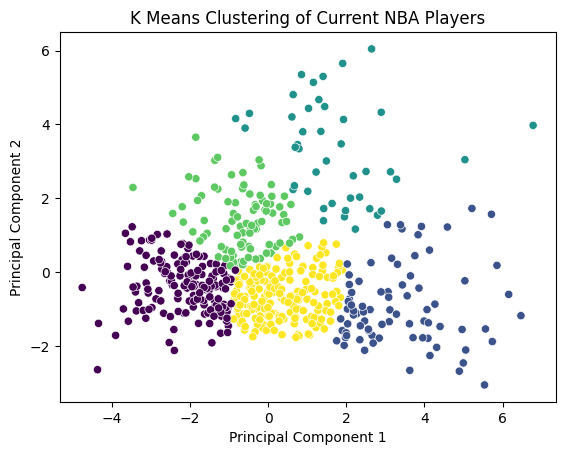

In [42]:
# K Means Clustering

kmeans = KMeans(n_clusters = 5)
kmeans.fit_transform(principal_df)

sns.scatterplot(x= 'Principal Component 1', y= 'Principal Component 2',  data= principal_df, c = kmeans.labels_)
plt.title('K Means Clustering of Current NBA Players')
plt.show()